### **K-Means Implementation**

In this section, we will try to implement the K-means clustering algorithm from scratch. 

In [ ]:
#importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [ ]:
'''
pre-declaring the number of clusters
'''

K = 3

We will try to generate a dataset in 2-dimensions with 3 clusters, and demonstrate that our algorithm manages to correctly classify the points into their respective clusters.

In [ ]:
data1 = np.random.rand(30,2)
x1 = data1[:,0]*0.6
y1 = data1[:,1]*0.6

data2 = np.random.rand(30,2)
x2 = data2[:,0]*0.8
y2 = data2[:,1]+1

data3 = np.random.rand(50,2)
x3 = data3[:,0]/2+1.5
y3 = data3[:,1]*2

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

data2D = np.empty((x.size,2))
for i in range(x.size):
  data2D[i][0]=x[i]
  data2D[i][1]=y[i]

In [ ]:
n = data2D.shape[0] #number of data points
p = data2D.shape[1] #number of features of each data point

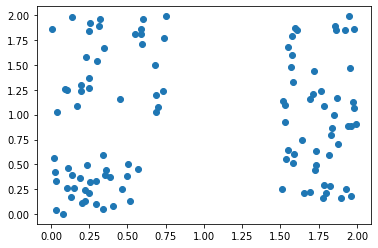

In [ ]:
plt.scatter(x,y) #scatter plot of the dataset

Now we will implement the K-Means algorithm.

In [ ]:
'''
Normally we stop the K-Means algorithm when there is no change in the cluster allocation of data points.
But for practical purposes, we decide a fixed (large) number of iterations
'''
num_iters = 1000

#selecting K random centroids from the data points
centroids = np.zeros((K,2))
rnd = np.random.randint(0,n-1,size=K)

for i in range(K):
  centroids[i] = data2D[rnd[i]]


In [ ]:
output2D = [] #we will store the data points and their respective centroids in a x*p array

for i in range(num_iters): 

      #calculating distance of all data points from the k centroids 
      dist = np.empty((n,K))
      for k in range(K):
        dist[:,k] = np.sum((data2D-centroids[k])**2,axis=1) 

      #storing centroid at minimum distance, and respective data points in each cluster
      min_centroid = np.argmin(dist,axis=1) 

      temp = []
      for k in range(K):
          temp.append([])

      for j in range(n):
          temp[min_centroid[j]].append(data2D[j])

      for k in range(K):
          temp[k] = np.array(temp[k])

      #updating the value of the centroid
      for k in range(K):
        centroids[k,:] = np.mean(temp[k],axis=0) 
    
      output2D = np.array(temp) #storing output after all steps of one iteration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


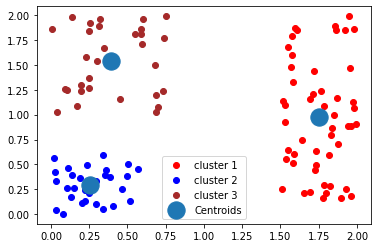

In [ ]:
color=['red','blue','brown']
labels=['cluster 1','cluster 2','cluster 3']
for k in range(K):
    plt.scatter(output2D[k][:,0],output2D[k][:,1],c=color[k],label=labels[k])
plt.scatter(centroids[:,0],centroids[:,1],s=300,label='Centroids')
plt.legend()
plt.show()

Hence we see that our implementation of the K-Means algorithm works perfectly fine with our constructed 3 cluster 2D data-set.

Below is the given code as a function for given p-dimensional data, K and number of iterations.

In [ ]:
#entire code as a concise function

def KMeans(data, K, num_iters):

  n = data.shape[0]
  p = data.shape[1]

  centroids = np.zeros((K,p))
  rnd = np.random.randint(0,n-1,size=K)

  for i in range(K):
    centroids[i] = data[rnd[i]]

  outputs = [] 
  for i in range(num_iters): 
  
    dist = np.empty((n,K))
    for k in range(K):
      dist[:,k] = np.sum((data-centroids[k])**2,axis=1) 

      
    min_centroid = np.argmin(dist,axis=1) 

    temp = []
    for k in range(K):
      temp.append([])

    for j in range(n):
      temp[min_centroid[j]].append(data[j])

    for k in range(K):
      temp[k] = np.array(temp[k])

    for k in range(K):
      centroids[k,:] = np.mean(temp[k],axis=0) 
        
    outputs = np.array(temp) 

  return outputs, centroids



### **Color Detection**

K-Means algorithm has a lot of practical applications. One of such applications is color detection. In this notebook, we will use our previously implemented clustering algorithm to detect colors in an image.

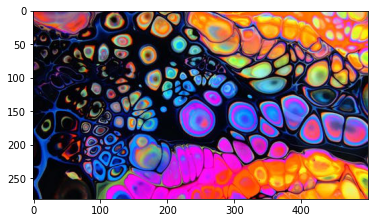

In [ ]:
#loading image

img=plt.imread('/content/color.jpeg')
plt.imshow(img)

In [ ]:
img.shape

(281, 500, 3)

In [ ]:
clr_data = img.reshape(img.shape[0]*img.shape[1],img.shape[2]) #preprocessing

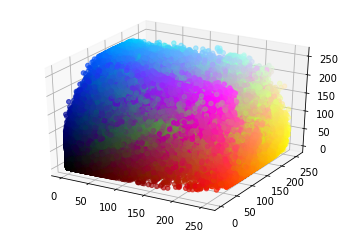

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
R=[]
B=[]
G=[]
C=[]

for i in range(img.shape[0]):
     for j in range(img.shape[1]):
          r = img[i][j][0]
          b = img[i][j][1]
          g = img[i][j][2]

          color = (r/255, b/255, g/255)
          
          R.append(r)
          B.append(b)
          G.append(g)
          C.append(color)

ax.scatter(R,B,G,c=C)
plt.show()

In [ ]:
clr_outputs, clr_centroids = KMeans(clr_data, K=7, num_iters=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
def plot_colors(outputs, centroids):
  perc=[]
  for i in range(len(centroids)):
    perc.append(outputs[i].size/outputs.size)
  
  plt.pie(perc,colors=np.array(centroids/255),labels=np.arange(len(centroids)))
  plt.show()  


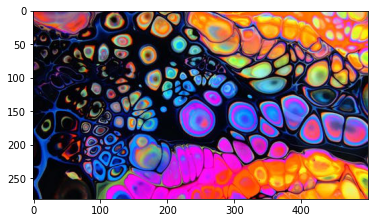

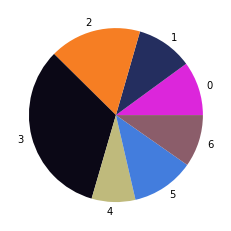

In [ ]:
plt.imshow(img)
plt.figure()
plot_colors(clr_outputs, clr_centroids)

Visualization of data points in a scatter 3D plot:

### **Filtering Images on basis of color**

Now we will use our color extraction model to filter images from a given set of images, on the basis of color. In this notebook, we will demonstrate it using an example set of 6 images. We will search these images for three colors: Red, Green and Blue.

In [ ]:
from skimage.color import rgb2lab, deltaE_cie76

In [ ]:
# making a dictionary of colors and their RGB values

color_dict = {}

color_dict['red'] = [255,0,0]
color_dict['green'] = [0,128,0]
color_dict['blue'] = [0,0,128]

In [ ]:
img1 = plt.imread('/content/images/blue.jpg')
img2 = plt.imread('/content/images/green.jpg')
img3 = plt.imread('/content/images/red.jpg')
img4 = plt.imread('/content/images/red2.jpg')
img5 = plt.imread('/content/images/blue3.jpg')
img6 = plt.imread('/content/images/green2.webp')

images = [img1, img2, img3, img4, img5, img6]

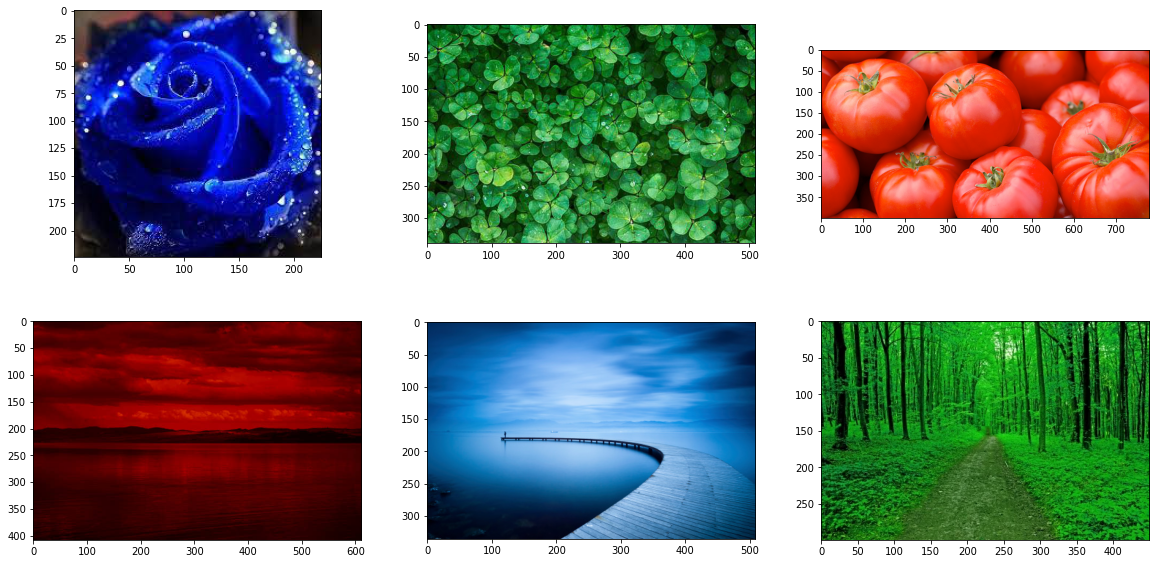

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])

In [ ]:
def find_images(images, color, threshold, K):

  found_images = []
  given_color_value = rgb2lab(np.uint8(color_dict[color]))

  for i in range(len(images)):

    data = images[i].reshape(images[i].shape[0]*images[i].shape[1],images[i].shape[2]) 
    outputs, centroids = KMeans(data, K, 200) #using KMeans to extract the colors

    flag = False
    for k in range(K):
      found_color_value = rgb2lab(np.uint8(centroids[k])) 
      diff = deltaE_cie76(found_color_value, given_color_value)
      #print(diff)
      if (diff<threshold):
        flag = True

    if (flag):
      found_images.append(images[i])

  return found_images      

In [ ]:
blue_images = find_images(images, 'blue', 60, 4)

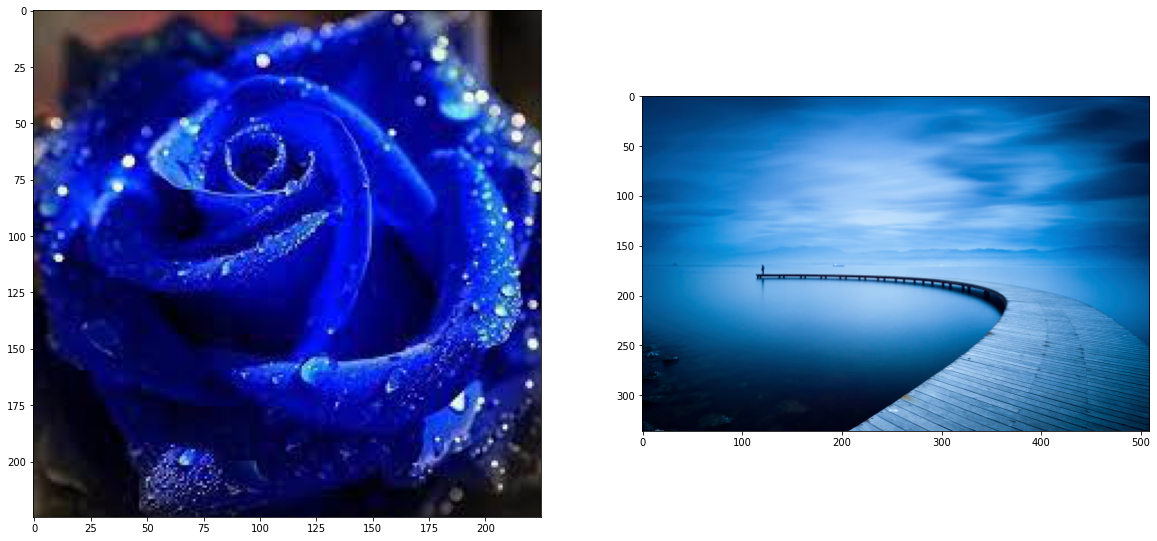

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(blue_images)):
  plt.subplot(1, len(blue_images), i+1)
  plt.imshow(blue_images[i])

In [ ]:
red_images = find_images(images, 'red', 60, 4)

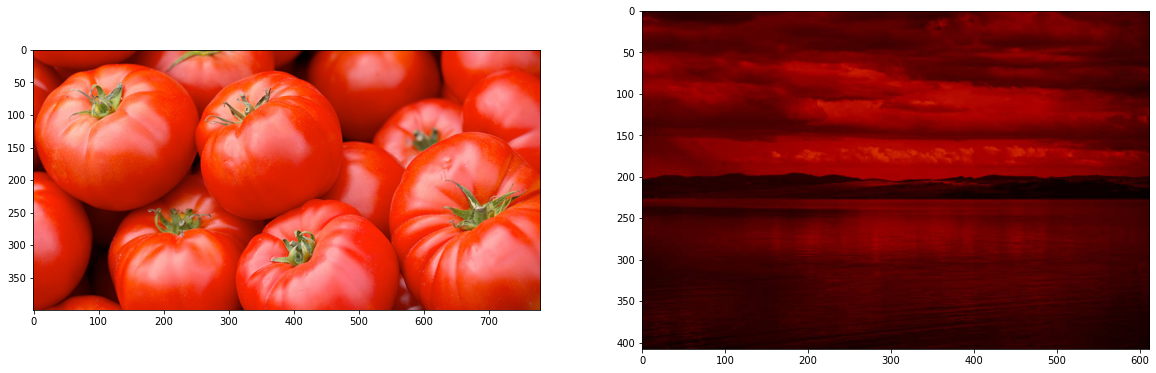

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(red_images)):
  plt.subplot(1, len(red_images), i+1)
  plt.imshow(red_images[i])

In [ ]:
green_images = find_images(images, 'green', 60, 4)

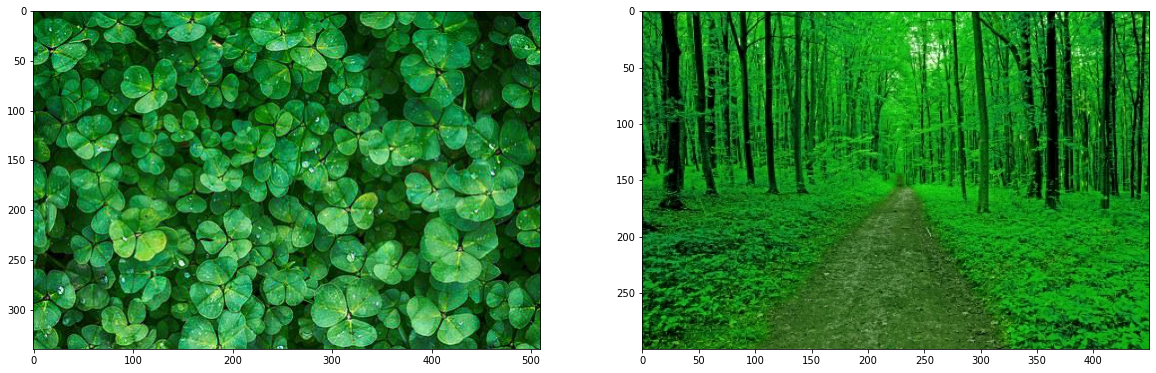

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(green_images)):
  plt.subplot(1, len(green_images), i+1)
  plt.imshow(green_images[i])